## Obyčejné diferenciální rovnice


In [ ]:
!python -m pip install scipy

In [ ]:
!python -m pip install sympy

In [3]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import sympy

#### Cvičení - řešení rovnice
Vyřešte rovnici 

$$ y^{\prime} = x; ~~y(x_0) = 2,x_0 = 0$$

pomocí 

- symbolické matematiky,
- vybrané numerické metody (jednokrokové),
- vybrané vestavěné funkce softwaru (např. *integrate*).


Porovnejte jednotlivá řešení z hlediska implementace, rychlosti a přesnosti řešení.

rovnice: Eq(Derivative(y(x), x), x)
řešení:  Eq(y(x), x**2/2 + 2)
rhs:     x**2/2 + 2


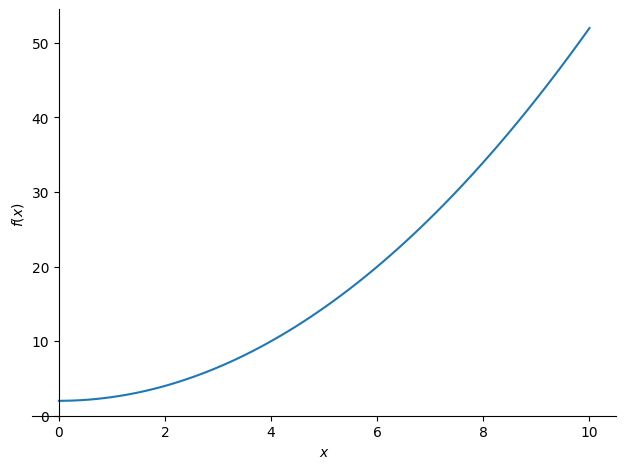

In [4]:
# symbolické řešení (y'= x)
from sympy import Function, dsolve, Eq, symbols
from sympy.plotting import plot

x = symbols('x')                                        # definice symbolů
y = symbols('y', cls=Function)                          # y=Function('y')

eq = Eq(y(x).diff(x), x)                                # y' = x
print("rovnice:", eq)
sol = dsolve(eq, hint='1st_linear', ics={y(0): 2})      # metoda, množina počátečních podmínek (y(0) = 2)
#                lineární 1. řádu, initial conditions

print("řešení: ", sol)
print("rhs:    ", sol.rhs)                              # pravá strana (right hand side)
plot(sol.rhs, (x,0,10))                                 # graf pomocí sympy

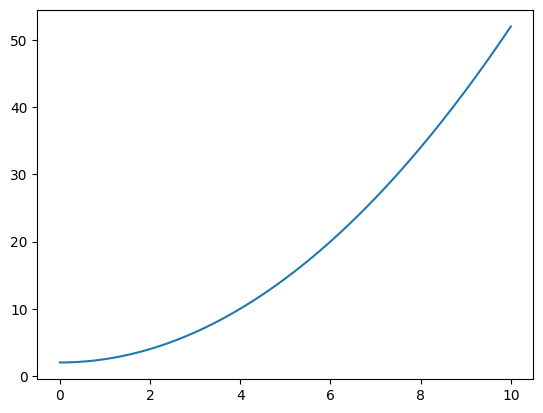

In [6]:
# vykreslení řešení (y'= x) pomocí matplotlib
from sympy import lambdify
f = lambdify(x, sol.rhs, "numpy")       # převod funkce sympy -> numpy (symbol, výraz, modul)

xn = np.linspace(0, 10, 100)
yn = f(xn)
plt.plot(xn, yn)
plt.show()

Explicitní Eulerova metoda

$𝑦^{𝑖+1}=𝑦^{𝑖}+𝑓(𝑥^𝑖,𝑦^𝑖)\Delta x$, $\quad$ řešíme rovnici $y'= x$


x:[0 1 2 3 4 5 6 7 8 9]
y:[ 2.  2.  3.  5.  8. 12. 17. 23. 30. 38.]


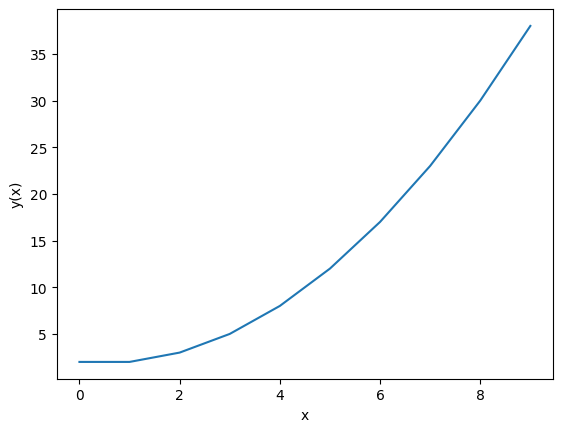

In [7]:
# řešení rovnice (y'= x) pomocí vlastní metody 
def odeEuler(f, y0, x):
    y = np.zeros(len(x))
    y[0] = y0
    for i in range(0,len(x)-1):
        y[i+1] = y[i] + f(y[i],x[i])*(x[i+1] - x[i])
    return y

x0 = 0
y0 = 2
xmax = 10
dx = 1

x = np.arange(x0, xmax, dx)

f = lambda y, x: x                      # funkce y a x, vrací x (rovnice y'= x)
# print(f(1,2))

def funkce(y, x):                       # totéž
    return x

y = odeEuler(f, y0, x)                  # (funkce, poč. bod, pole x)

print(f"x:{x}\ny:{y}")                  # pole x a pole y
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()

Knihovna scipy - odeint
- Ordinary Differential Equation

x:[0 1 2 3 4 5 6 7 8 9]
y:[[ 2.        ]
 [ 2.50000001]
 [ 4.00000001]
 [ 6.50000001]
 [10.00000001]
 [14.50000001]
 [20.00000001]
 [26.50000001]
 [34.00000001]
 [42.50000001]]


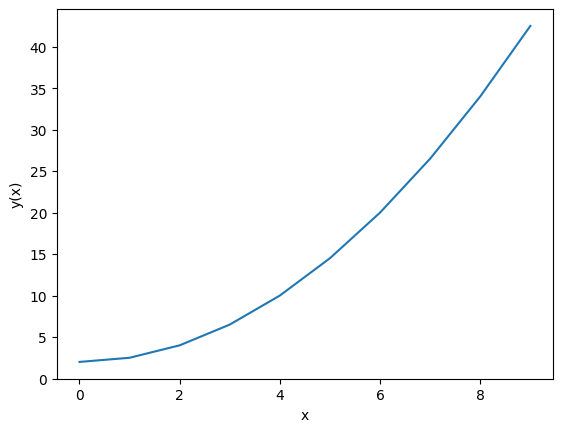

In [8]:
# pomocí scipy
from scipy.integrate import odeint

f = lambda y, x: x                      # funkce y a x, vrací x (rovnice y'= x)
#def f(y, x):                           # totéž
#    return x

x0 = 0
y0 = 2
xmax = 10
dx = 1

x = np.arange(x0, xmax, dx)
y = odeint(f, y0, x)                    # funkce, poč. bod, pole x

print(f"x:{x}\ny:{y}")
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()

Řešte diferenciální rovnici $$\frac{dy}{dt}=-yt+13$$ pomocí scipy.integrate.odeint

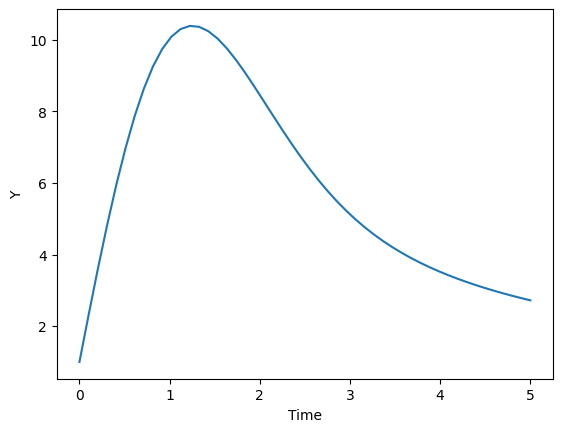

In [1]:

import numpy as np 
from scipy.integrate import odeint 
import matplotlib.pyplot as plt 
  
def returns_dydt(y,t):  # vrací pravou stranu ODE (derivaci), parametry aktuální stav systému a čas
    dydt = -y * t + 13
    return dydt 

y0 = 1                              # počáteční podmínka 
  
t = np.linspace(0,5)                # hodnoty času
  

y = odeint(returns_dydt, y0, t)     # řešení ODE 
  

plt.plot(t,y)                       # vykreslení výsledků 
plt.xlabel("Time") 
plt.ylabel("Y") 
plt.show()


Řešte následující soustavu diferenciálních rovnic:
$$\frac{dx}{dt}=−y$$
$$\frac{dy}{dt}=x$$


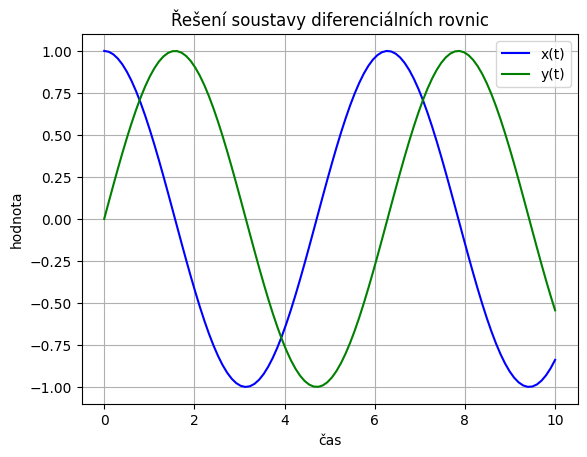

In [5]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# uvažujme U = [x,y]
def system(U, t):               # vrací pravé strany obou ODE, odpovídá dU/dt
    dxdt = -U[1]                # 1. rovnice            dx/dt = -y
    dydt = U[0]                 # 2. rovnice            dy/dt = x
    return [dxdt, dydt]

U0 = [1.0, 0.0]                 # počáteční podmínky    x = 1, y = 0

t = np.linspace(0, 10, 100)     # časový rozsah

sol = odeint(system, U0, t)     # řešení soustavy (systém, poč. podmínky, pole nez. proměnné)

# vykreslení výsledků
plt.plot(t, sol[:, 0], 'b', label='x(t)')
plt.plot(t, sol[:, 1], 'g', label='y(t)')
plt.xlabel('čas')
plt.ylabel('hodnota')
plt.legend(loc='best')
plt.title('Řešení soustavy diferenciálních rovnic')
plt.grid()
plt.show()


#### Cvičení - výtok vody otvorem
Máme nádobu s vodou, která má otvor na dně. Předpokládejme, že voda z otvoru vytéká rychlostí úměrnou množství vody v láhvi. Množství vody v láhvi se postupně snižuje, což znamená, že rychlost, kterou voda vytéká, se také snižuje.

Eq(V(t), 10*exp(-0.1*t))


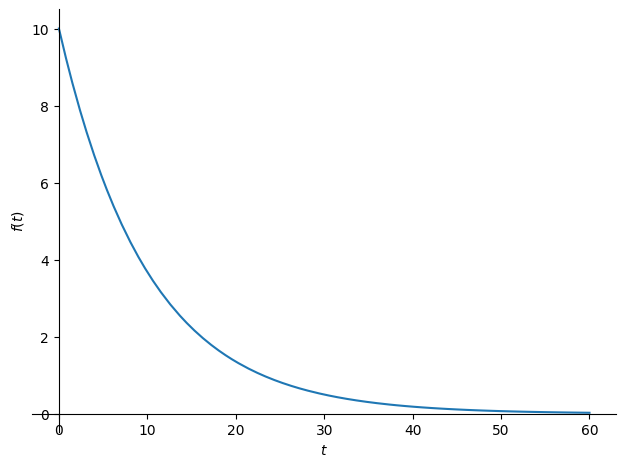

In [9]:
from sympy import Function, dsolve, Eq, symbols
from sympy.plotting import plot

t = symbols('t')
k = symbols("k")
V = Function("V")                       # neznámá fce
k = 0.1
eq = Eq(V(t).diff(t), -k*V(t))          # rovnice dV/dt = -kV
sol = dsolve(eq, ics={V(0): 10})        # nutno zadat počáteční podmínku (zkuste, co se stane bez jejího zadání)
print(sol)
plot(sol.rhs,(t,0,60))

Jak se závislost změní, pokud konstanta k bude mít jiné znaménko?

#### Cvičení - Verhulstův populační model
Vyřešte následující diferenciální rovnici pomocí symbolické a numerické matematiky.
$$\frac{{\rm d} N(t)}{{\rm d}t} = rN(t)\left( 1 - \frac{N(t)}{K} \right)$$
kde $r=2$ a $K=50$ jsou konstanty. Uvažujte počáteční podmínku $N(0) = 1$


Eq(N(t), 50/(1 + 49*exp(-2*t)))


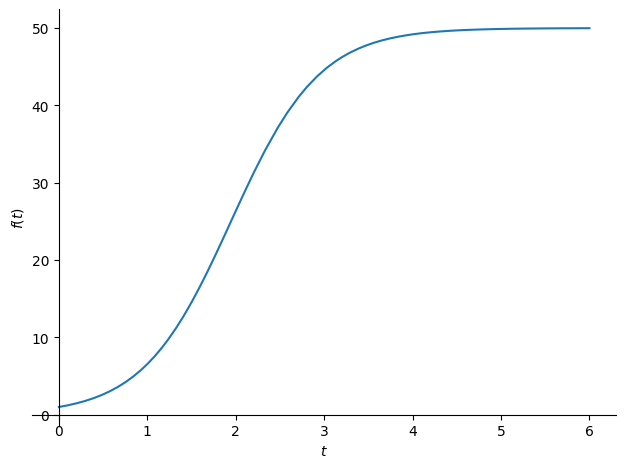

In [10]:
# pomocí sympy
from sympy import Function, dsolve, Eq, symbols
from sympy.plotting import plot

t = symbols('t')
r, K = symbols('r K', integers=True)
N = symbols('N', cls=Function)

r = 2
K = 50

eq = Eq(N(t).diff(t), r*N(t)*(1-N(t)/K))
sol = dsolve(eq, ics={N(0): 1})                 # N(0) = 1

print(sol)
plot(sol.rhs,(t,0,6))

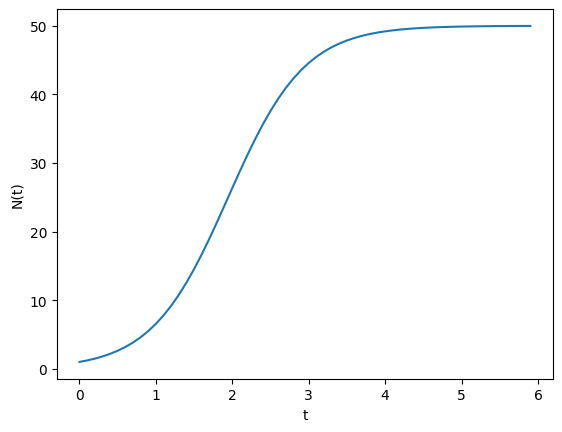

In [11]:
# pomocí scipy
from scipy.integrate import odeint

def model(N, t, r, K):
    dNdt = r*N*(1-N/K)
    return dNdt

t0 = 0
N0 = 1
tmax = 6
dt = 0.1
r = 2
K = 50

t = np.arange(t0, tmax, dt)
N = odeint(model, N0, t, args=(r, K))

plt.plot(t,N)
plt.xlabel('t')
plt.ylabel('N(t)')
plt.show()

#### Cvičení - Nucené kmitání
Vyřešte následující soustavu diferenciální rovnici pomocí symbolické a numerické matematiky.

$$
\begin{align}
\frac{{\rm d} x}{{\rm d}t} = & v \\
\frac{{\rm d} x}{{\rm d}t} = & -\omega x - \beta\frac{{\rm d} x}{{\rm d}t} - F_0\sin(\Omega t)
\end{align}
$$
kde $\omega=1$, $\beta=0.05$, $F_0=2.0$ a $\Omega=0.63$.

Uvažujte počáteční podmínky jsou $x=3.0$, $v=0.0$.


Eq(x(t), (-2.00483019553968*sin(0.99968745115661*t) + 3.17273436804693*cos(0.99968745115661*t))*exp(-0.025*t) + 3.30717769425721*sin(0.63*t) - 0.172734368046928*cos(0.63*t))


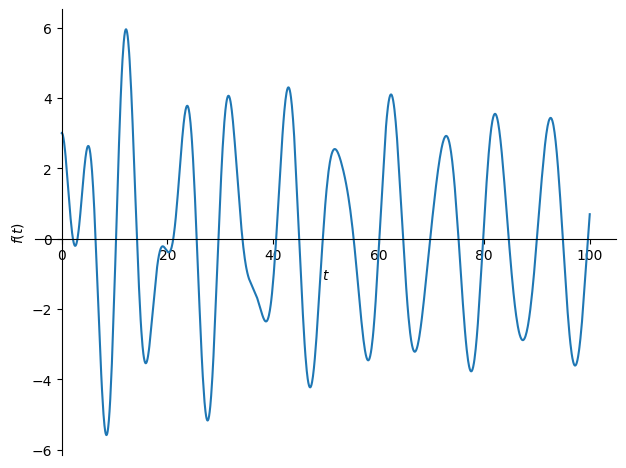

In [12]:
# analytické řešení - sympy
import sympy
from sympy import Function, dsolve, Eq, symbols
from sympy.plotting import plot

t, omega, beta, Omega, F0 = symbols('t omega beta Omega F0')
x = symbols('x', cls=Function)

x0 = 3.0            # poč. výchylka
v0 = 0.0            # poč. rychlost
omega = 1.0         # vlastní úhl. frekvence (čtverec)
beta = 0.05         # tlumení
Omega = 0.63        # budící úhl. frekvence
F0 = 2.0            # budící amplituda

# x"  = - omega*x - beta*x' - F0*sympy.sin(Omega*t)
v = Eq(x(t).diff(t, t), -omega*x(t) -beta*x(t).diff(t) + F0*sympy.sin(Omega*t))

#  initial/boundary condition set: slovník, klíč nezávisle proměnná
#y1 = dsolve(v, ics={x(0): x0, x(1): v0})
ics = {x(0): x0, x(t).diff(t).subs(t, 0): v0}
y = dsolve(v, ics=ics)     

print(y)
plot(y.rhs,(t,0,100))

[[ 3.          0.        ]
 [ 2.98521775 -0.29275528]
 [ 2.94195581 -0.56857137]
 ...
 [ 0.26986584  2.13980006]
 [ 0.4824494   2.10619889]
 [ 0.69124841  2.06424118]]


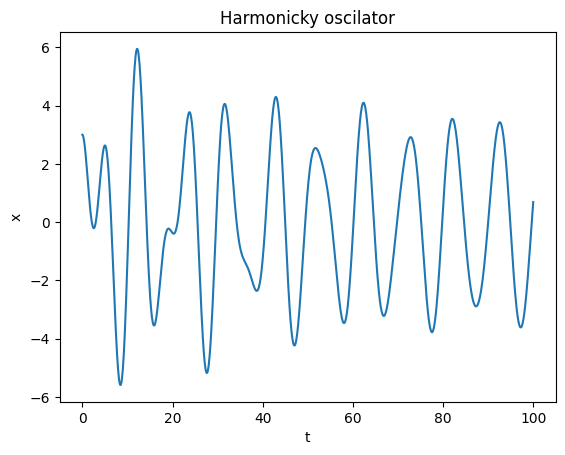

In [13]:
# numerické řešení - scipy a matplotlib
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def tlumene_kmitani(x0, v0, omega, beta, Omega, F0):

    # x' = v
    # v' = a  = - omega*x - beta*x' - F0*sympy.sin(Omega*t)
    def dUdt(U, t, omega, beta, Omega, F0):     # vrací [v, a]
        # U[0] = x
        # U[1] = v = dx/dt
        return [U[1], -omega*U[0] - beta*U[1] + F0*np.sin(Omega*t)]
    # U je dvojice [x, v]
    U0 = [x0, v0]
    t = np.linspace(0, 100, 1000)           # vektor nezávisle proměnné
    args=(omega, beta, Omega, F0)
                                            # parametry odeint: funkce, poč. bod, pole t
    U = odeint(dUdt, U0, t, args=args)      # funkce vrací [v=dx/dt, a=dv/dt=d2x/dt2]
    print(U)
    x = U[:,0]                              # získání x v daných časech z nasčítaných v=dx/dt

    plt.xlabel("t")
    plt.ylabel("x")
    plt.title("Harmonicky oscilator")
    plt.plot(t, x)

# omega = uhlova frekvence vlastniho kmitani
# beta = utlum vlastniho kmitani
# Omega = uhlova frekvence budici sily
# F0 = amplituda budici sily
# x0 = pocatecni vychylka vlastniho kmitani
# v0 = pocatecni rychlost vlastniho kmitani
tlumene_kmitani(x0=3.0, v0=0.0, omega=1.0, beta=0.05, Omega=0.63, F0=2.0)

[[ 0.          1.        ]
 [ 0.099933    0.99499417]
 [ 0.19886552  0.98002679]
 ...
 [-0.66773898  0.74439758]
 [-0.59000649  0.80740042]
 [-0.50636706  0.86231984]]


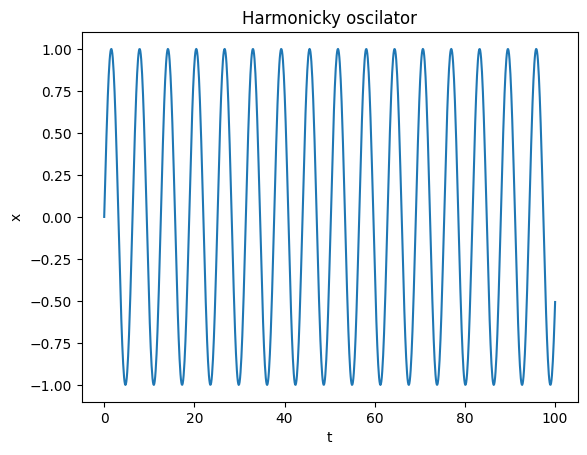

In [14]:
# netlumene kmitani (oscilator nenarazi do molekul prostredi a neztraci energii)
tlumene_kmitani(x0=0.0, v0=1.0, omega=1.0, beta=0.0, Omega=0.0, F0=0.0)

[[ 0.          1.        ]
 [ 0.0994345   0.98506738]
 [ 0.1968881   0.96047051]
 ...
 [-0.00514637  0.00471824]
 [-0.00465154  0.00515951]
 [-0.0041153   0.00554499]]


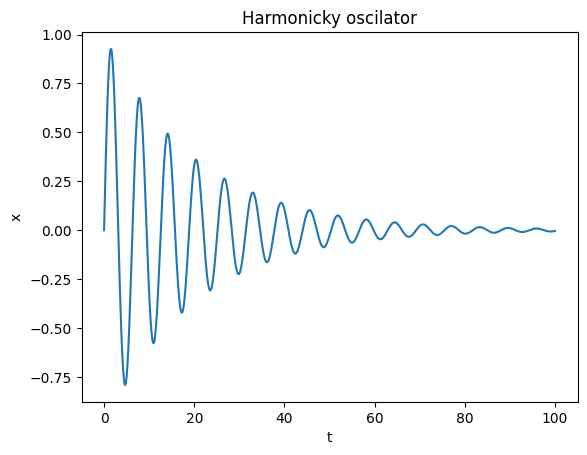

In [15]:
# tlumene kmitani nebuzene (oscilator narazi do molekul prostredi a ztraci energii)
tlumene_kmitani(x0=0.0, v0=1.0, omega=1.0, beta=0.1, Omega=0.0, F0=0.0)

[[  0.           1.        ]
 [  0.10010001   0.99999567]
 [  0.20019749   0.99993309]
 ...
 [-38.14693468 -32.57564422]
 [-41.2145753  -28.66333208]
 [-43.87549136 -24.45597556]]


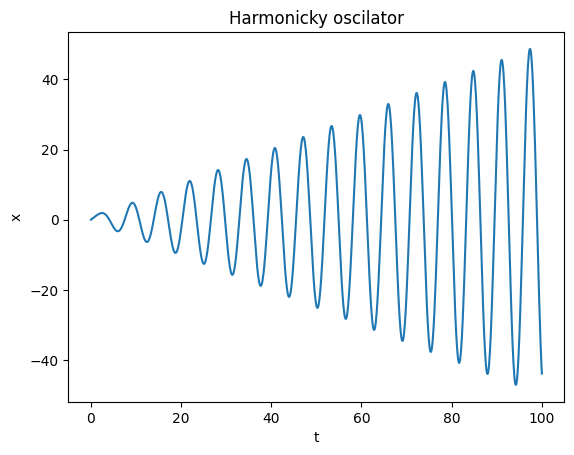

In [16]:
# netlumene kmitani buzene (oscilator nepredava energii, ale naopak ji ziskava od synchronizovane budici sily)
# rezonance
tlumene_kmitani(x0=0.0, v0=1.0, omega=1.0, beta=0.0, Omega=1.0, F0=1.0)

[[ 0.          1.        ]
 [ 0.09998313  0.99649581]
 [ 0.19926585  0.98601695]
 ...
 [-1.54157186  0.53020132]
 [-1.48584862  0.58227407]
 [-1.42518257  0.62889123]]
[[ 0.          1.        ]
 [ 0.10003325  0.99799744]
 [ 0.19966618  0.99200711]
 ...
 [-2.41540427  0.31600388]
 [-2.3816904   0.35714648]
 [-2.34399785  0.39546137]]


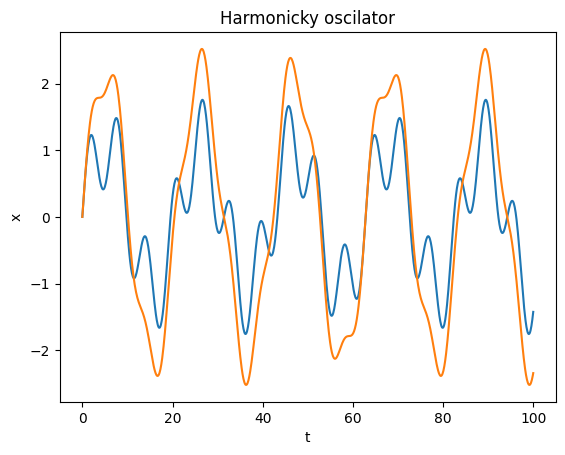

In [17]:
#netlumene kmitani buzene (oscilator nepredava energii, ale naopak ji ziskava od nesynchronizovane budici sily)
tlumene_kmitani(x0=0.0, v0=1.0, omega=1.0, beta=0.0, Omega=0.3, F0=1.0)
tlumene_kmitani(x0=0.0, v0=1.0, omega=1.0, beta=0.0, Omega=0.3, F0=2.0)

#### Cvičení - Vektorové pole
Zobrazte jednotlivá řešení následujících rovnic pomocí vektorového pole.
$$
\begin{align*}
  y^{\prime} =& x + y\\
  y^{\prime} =& -\frac{x}{y}\\
  y^{\prime} =& \frac{y^2}{x}
\end{align*}
$$


- Zvolte řešení $(x,y)$ v rozsahu $(-5,5)$
  - tj. specifikujeme hodnoty y pro x=0, pro které chceme řešení najít
- Pro řešení rovnic zvolte numerickou nebo symbolickou matematiku
- Vyznačte řešení, které vyhovuje vámi vybraným počátečním podmínkám



y0:-5 Eq(y_sym(x_sym), -x_sym - 4*exp(x_sym) - 1)
y0:-3 Eq(y_sym(x_sym), -x_sym - 2*exp(x_sym) - 1)
y0:0 Eq(y_sym(x_sym), -x_sym + exp(x_sym) - 1)
y0:3 Eq(y_sym(x_sym), -x_sym + 4*exp(x_sym) - 1)
y0:5 Eq(y_sym(x_sym), -x_sym + 6*exp(x_sym) - 1)


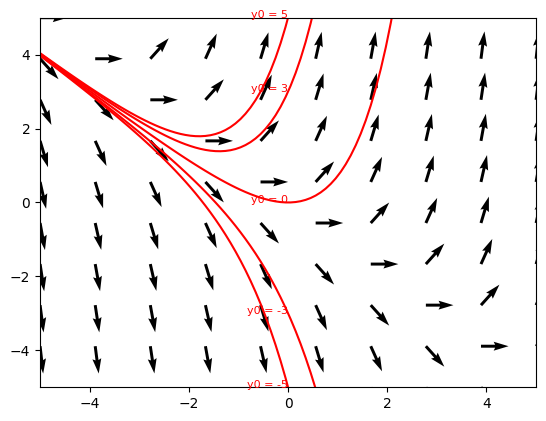

In [37]:
# y' = x + y
import numpy as np
import matplotlib.pyplot as plt
from sympy import Function, dsolve, Eq, symbols, lambdify

xymin = -5
xymax = 5
plt.xlim(xymin, xymax)                      # nastavení měřítka x
plt.ylim(xymin, xymax)                      # nastavení měřítka y

#reseni diferencialni rovnice
x = np.linspace(xymin, xymax, 100)          # pole x
y0s = [-5, -3, 0, 3, 5]                     # konkrétní ics v <-5, 5> (hodnoty y pro x = 0)
xs = symbols('x_sym')
ys = symbols('y_sym', cls=Function)
eq = Eq(ys(xs).diff(xs), xs + ys(xs))       # y' = x + y

# vykreslení konkrétních řešení 
for y0 in y0s:                              # přes jednotlivé ics
    sol = dsolve(eq, ics={ys(0): y0})       # řešíme rovnici s konkrétní počáteční podmínkou
    print(f"y0:{y0}", sol)
    y = lambdify(xs, sol.rhs)               # převede symbolickou funkci na numpy
    plt.plot(x, y(x), "r-")                 # řešení pro každou poč. podmínku (červeně)
    plt.text(0, y(0), f'y0 = {y0}', fontsize=8, color='red', ha='right')

# vektorové pole
nvec_on_row = 10                            # počet šipek na řádku
# pozice šipek (v obou směrech x,y stejný počet)
X,Y = np.meshgrid(np.linspace(xymin, xymax, nvec_on_row),np.linspace(xymin, xymax, nvec_on_row))

U = 1                                       # směr doprava
V = X + Y                                   # y' = x + y (y' je rychlost)
norm = np.sqrt(U**2 + V**2)
U /= norm
V /= norm
plt.quiver(X,Y,U,V)                         # 2D pole šipek: X, Y umístění šipek, U, V směry

plt.show()

y0:-5 Eq(y_sym(x_sym), -sqrt(25 - x_sym**2))
y0:-3 Eq(y_sym(x_sym), -sqrt(9 - x_sym**2))


<lambdifygenerated-83>:2: RuntimeWarning: invalid value encountered in sqrt
  return -sqrt(9 - x_sym**2)


y0:1 Eq(y_sym(x_sym), sqrt(1 - x_sym**2))
y0:3 Eq(y_sym(x_sym), sqrt(9 - x_sym**2))


<lambdifygenerated-84>:2: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(1 - x_sym**2)
<lambdifygenerated-85>:2: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(9 - x_sym**2)


y0:5 Eq(y_sym(x_sym), sqrt(25 - x_sym**2))


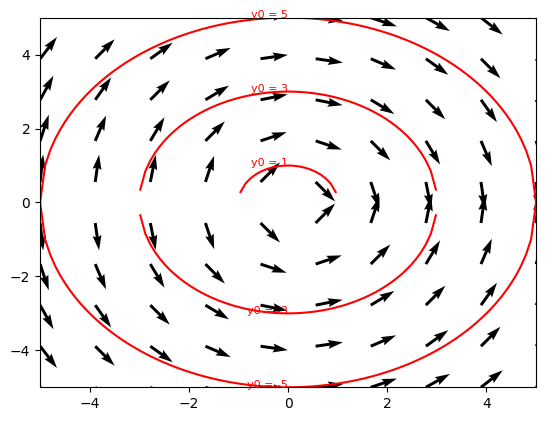

In [38]:
# y' = -x/y
import numpy as np
import matplotlib.pyplot as plt
from sympy import Function, dsolve, Eq, symbols, lambdify

xymin = -5
xymax = 5
plt.xlim(xymin, xymax)
plt.ylim(xymin, xymax)

#reseni diferencialni rovnice
x = np.linspace(xymin, xymax, 100)
y0s = [-5, -3, 1, 3, 5]
x_sym = symbols('x_sym')
y_sym = symbols('y_sym', cls=Function)
eq = Eq(y_sym(x_sym).diff(x_sym), -x_sym/y_sym(x_sym))
for y0 in y0s:
    sol = dsolve(eq, ics={y_sym(0): y0})
    print(f"y0:{y0}", sol)
    y = lambdify(x_sym, sol.rhs)
    plt.plot(x, y(x), "r-")
    plt.text(0, y(0), f'y0 = {y0}', fontsize=8, color='red', ha='right')

#vektorove pole
nvec_on_row = 10
X,Y = np.meshgrid(np.linspace(xymin, xymax, nvec_on_row),np.linspace(xymin, xymax, nvec_on_row))
U = 1
V = -X/Y
norm = np.sqrt(U**2 + V**2)
U /= norm
V /= norm
plt.quiver(X,Y,U,V)

plt.show()

Eq(y(x), -1/(C1 + log(x)))
Eq(y(x), -1/(log(x) - 1))


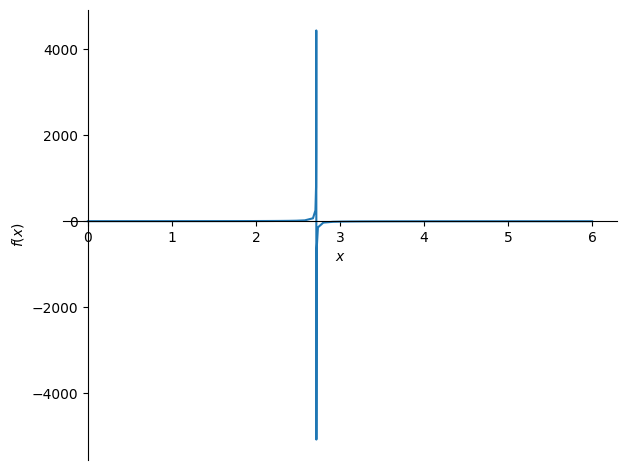

y0:0.1 Eq(y(x), -1/(log(x) - 10.0))
y0:3 Eq(y(x), -1/(log(x) - 1/3))
y0:5 Eq(y(x), -1/(log(x) - 1/5))


<lambdifygenerated-109>:2: RuntimeWarning: invalid value encountered in log
  return -1/(log(x) - 10.0)
<lambdifygenerated-110>:2: RuntimeWarning: invalid value encountered in log
  return -1/(log(x) - 1/3)
<lambdifygenerated-111>:2: RuntimeWarning: invalid value encountered in log
  return -1/(log(x) - 1/5)


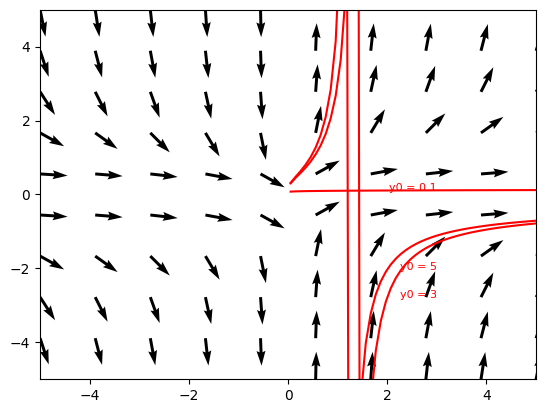

In [49]:
# y' = y^2/x
from sympy import symbols, Function, dsolve, lambdify
from sympy.plotting import plot
import numpy as np
import matplotlib.pyplot as plt

x = symbols('x')
y = Function('y')(x)

eq = y.diff(x) - y**2/x

solution = dsolve(eq, y)
print(solution)
sol = dsolve(eq, y, ics={y.subs(x, 1): 1})
print(sol)
plot(sol.rhs, (x, 0.0001, 6))

xymin = -5
xymax = 5
plt.xlim(xymin, xymax)                      # nastavení měřítka x
plt.ylim(xymin, xymax)                      # nastavení měřítka y

xn = np.linspace(xymin, xymax, 100)          # pole x
y0s = [0.1, 3, 5]                     # konkrétní ics v <-5, 5> (hodnoty y pro x = 0)


for y0 in y0s:
    sol = dsolve(eq, y, ics={y.subs(x, 1): y0})
    print(f"y0:{y0}", sol)
    yn = lambdify(x, sol.rhs)
    plt.plot(xn, yn(xn), "r-")
    plt.text(3, yn(2), f'y0 = {y0}', fontsize=8, color='red', ha='right')

#vektorove pole
nvec_on_row = 10
X,Y = np.meshgrid(np.linspace(xymin, xymax, nvec_on_row),np.linspace(xymin, xymax, nvec_on_row))
U = 1
V = Y*Y/X
norm = np.sqrt(U**2 + V**2)
U /= norm
V /= norm
plt.quiver(X,Y,U,V)

plt.show()

C:\Users\P\AppData\Local\Temp\ipykernel_5304\101118710.py:21: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  y = odeint(model, y0, x)


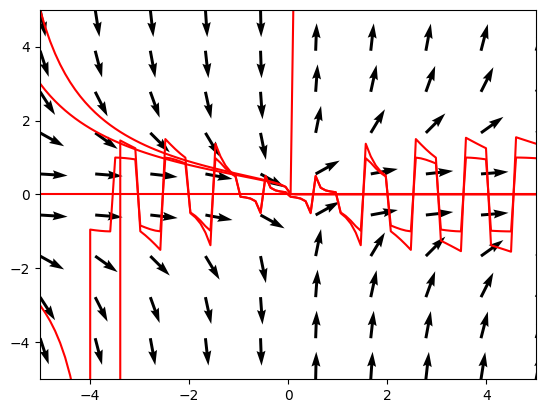

In [54]:
# y' = y^2/x
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# sympy úplně selže při řešení této rovnice :)

def model(y, x):
    dydx = y**2/x
    return dydx

xymin = -5
xymax = 5
plt.xlim(xymin, xymax)
plt.ylim(xymin, xymax)

# řešení diferencialni rovnice
x = np.linspace(xymin, xymax, 100)
y0s = [-5, -3, 0, 3, 5]
for y0 in y0s:
    y = odeint(model, y0, x)
    #print(y)
    plt.plot(x, y, "r-")

# vektorové pole
nvec_on_row = 10
X,Y = np.meshgrid(np.linspace(xymin, xymax, nvec_on_row),np.linspace(xymin, xymax, nvec_on_row))
U = 1
V = Y**2/X
norm = np.sqrt(U**2 + V**2)
U /= norm
V /= norm
plt.quiver(X,Y,U,V)

plt.show()

#### Eulerova metoda
řešíme rovnici $y'=0.05y$

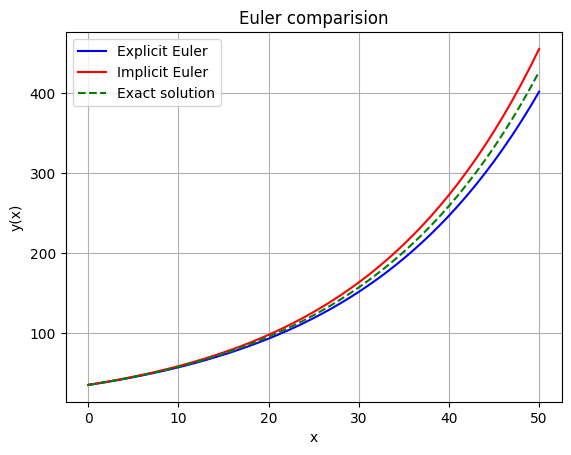

In [55]:
import numpy as np
import matplotlib.pyplot as plt

def explicit_euler(f, xmin, xmax, dx, y0, label):       # funkce, od, do, dx, y0, popis
    x = np.arange(xmin, xmax+dx, dx)
    yexpl = np.zeros(len(x))
    yexpl[0] = y0
    for i in range(0, len(x) - 1):
        yexpl[i+1] = yexpl[i] + dx*f(x[i], yexpl[i])
    plt.plot(x, yexpl, 'b-', label=label)
    return yexpl
    

def implicit_euler(f, xmin, xmax, dx, y0, label):

    def fixed_point_iteration(f, yi, xi_next, dx, niterations):
        yi_next = yi
        for i in range(niterations):
            yi_next = yi + dx*f(xi_next, yi_next)
        return yi_next

    x = np.arange(xmin, xmax+dx, dx)
    yimpl = np.zeros(len(x))
    yimpl[0] = y0
    for i in range(0, len(x) - 1):
        yi_next = fixed_point_iteration(f, yimpl[i], x[i+1], dx, 10) # = yimpl[i+1] aprox
        yimpl[i+1] = yimpl[i] + dx*f(x[i+1], yi_next)
    plt.plot(x, yimpl, 'r-', label=label)
    return yimpl

def presne(xmin, xmax, dx, y0, label):
    x = np.arange(xmin, xmax+dx, dx)
    y = y0*np.exp(0.05*x)
    plt.plot(x, y, 'g--', label=label)


explicit_euler(f=lambda x, y: 0.05*y, xmin=0, xmax=50, dx=1, y0=35, label="Explicit Euler")
implicit_euler(f=lambda x, y: 0.05*y, xmin=0, xmax=50, dx=1, y0=35, label="Implicit Euler")
presne(xmin=0, xmax=50, dx=1, y0=35, label="Exact solution")

plt.title('Euler comparision')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid()
plt.legend()
plt.show()

#### Cvičení - Euler
<font color="green">U následující rovnice nejdříve odvoďte a poté aplikujte implicitní i explicitní Eulerovu metodu. Postupně změňte krok *h* a sledujte přesnost a stabilitu obou metod, např. pomocí globální chyby. Počáteční podmínka je</font> $\color{green} y(0) = y_0 = 0$.

$$y^{\prime} = -100y + 100$$


In [ ]:
explicit_euler(f=lambda x, y: 0.05*y, xmin=0, xmax=50, dx=1, y0=35, label="Explicit Euler")
implicit_euler(f=lambda x, y: 0.05*y, xmin=0, xmax=50, dx=1, y0=35, label="Implicit Euler")

plt.title('Euler comparision')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid()
plt.legend()
plt.show()

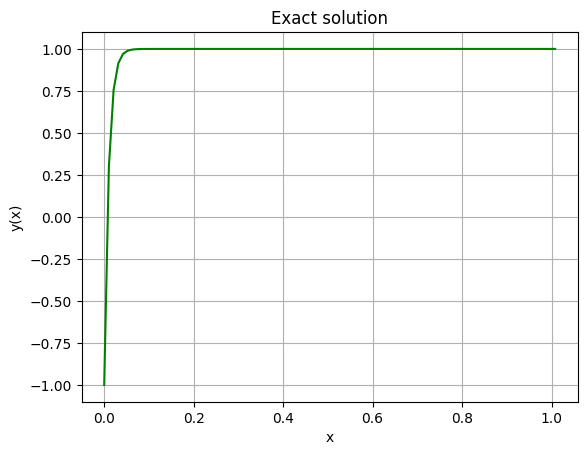

In [56]:
# přesné řešení
xmin=0
xmax=1
dx=0.0105

x = np.arange(xmin, xmax+dx, dx)
f_exact = lambda x: 1 - 2*np.exp(-100*x)
y_exact = f_exact(x)

plt.plot(x, y_exact, 'g-')

plt.title('Exact solution')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid()
plt.show()

Global error:  1.1718665216162698


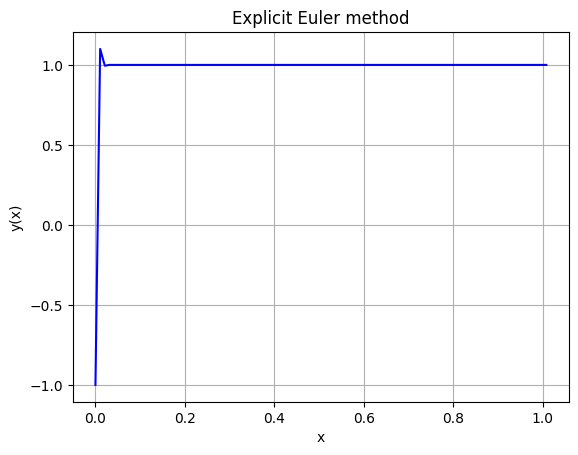

In [57]:
# Euler (explicitní)
y_expl = explicit_euler(f=lambda x, y: -100*y + 100, xmin=0, 
            xmax=1, dx=0.0105, y0=-1, label="Explicit Euler")

print("Global error: ", np.sum(np.abs(y_exact - y_expl)))

plt.title('Explicit Euler method')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid()
plt.show()

Global error:  1.7876131253665077


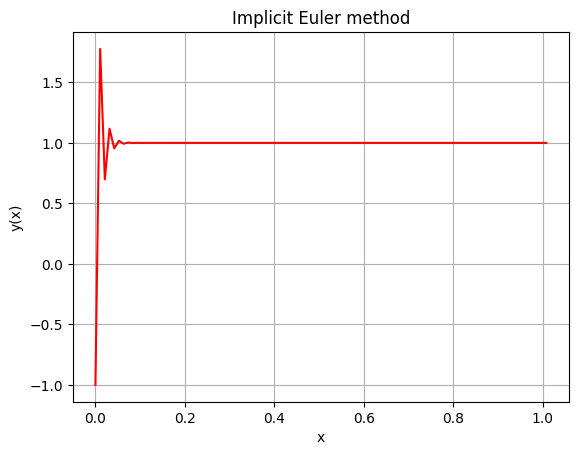

In [58]:
# Euler implicitní
y_impl = implicit_euler(f=lambda x, y: -100*y + 100, xmin=0, 
            xmax=1, dx=0.0105, y0=-1, label="Explicit Euler")

print("Global error: ", np.sum(np.abs(y_exact - y_impl)))

plt.title('Implicit Euler method')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid()
plt.show()

#### Stiff ODE solver

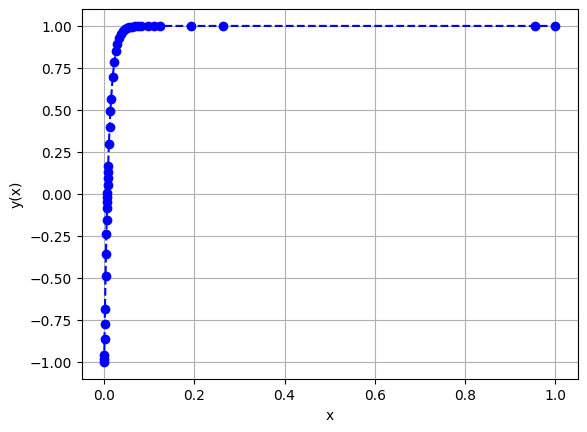

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def model(x, y):
    return -100*y + 100

y0 = -1
xmin = 0
xmax = 1

sol = solve_ivp(model, [xmin, xmax], [y0], method='BDF', first_step =0.0001, dense_output=True)
#print(sol)

plt.plot(sol.t, sol.y[0], 'bo--')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid()
plt.show()

#### Cvičení - Stiff
<font color="green">U následující soustavy rovnic nejdříve vypočítejte její koeficient tuhosti a poté pomocí implicitní a explicitní Eulerovy metody soustavu vyřešte. Počáteční podmínky jsou </font> $\color{green}y(0) = y_0 = 0$ <font color="green">a</font> $\color{green}z(0) = z_0 = 0$.
\begin{align*}
  y^{\prime} &=&998y + 1998z \\
  z^{\prime} &=-&999y - 1999z 
\end{align*}


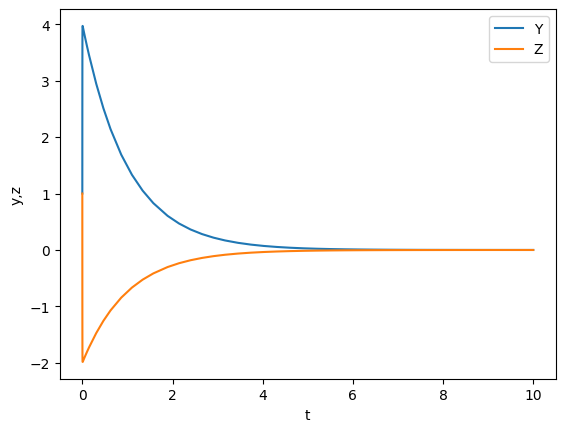

In [60]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def deriv(t, k):
    y, z = k
    dy = 998*y + 1998*z
    dz = -999*y - 1999*z
    return dy, dz

xmin, xmax = 0, 10

y0 = 1
z0 = 1
k = y0, z0

soln = solve_ivp(deriv, (xmin, xmax), k, method='BDF', first_step =0.0001, dense_output=True)

plt.plot(soln.t, soln.y[0], label='Y')
plt.plot(soln.t, soln.y[1], label='Z')
plt.xlabel('t')
plt.ylabel('y,z')
plt.legend()
plt.show()

#### Fyzikální model - ochlazování tělesa

Za jak dlouho se ochladí kovové těleso z počáteční teploty $T_t^0 = 120^\circ$ C na konečnou teplotu $T_f = 30^\circ$ C, jestliže je těleso obklopeno vzduchem s $T_p = 20^\circ$ C? 

Ohřev okolního vzduchu neuvažujeme.


- Rozměry tělesa:
 
  - $a=0.1~m,~b=0.05~m,~c=0.01~m$.
  - $A = 0.013~m^2$.
  - $V = 5\cdot10^{-5}~m^3$.

- Koeficient přestupu tepla $h = 0.85~W/(m^2K)$.
- Tepelná kapacita $C = 0.175~J/K$.
- Určíme konstantu $B =\frac{hA}{C} = 0.06~s^1$.


In [62]:
# Definice konstant
T_p = 20    # Teplota okolí [°C]
T_f = 30    # Konečná teplota tělesa [°C]
T_0 = 120   # Počáteční teplota tělesa [°C]
B = 0.06    # Konstanta z Newtonova zákona ochlazování [1/s]

# Délka kroku
dt = 0.1  # [s]


In [63]:
# Výpočet času pomocí Eulerovy metody
t = 0       # Inicializace času, teploty a počtu kroků
T = T_0
steps = 0

# Eulerova metoda pro numerické řešení diferenciální rovnice
while T > T_f:
    dTdt = -B * (T - T_p)
    T += dTdt * dt
    t += dt
    steps += 1

# Výsledky
print(f"Těleso se ochladí na {T_f}°C za {t:.2f} sekund ({steps} kroků).")


Těleso se ochladí na 30°C za 38.30 sekund (383 kroků).


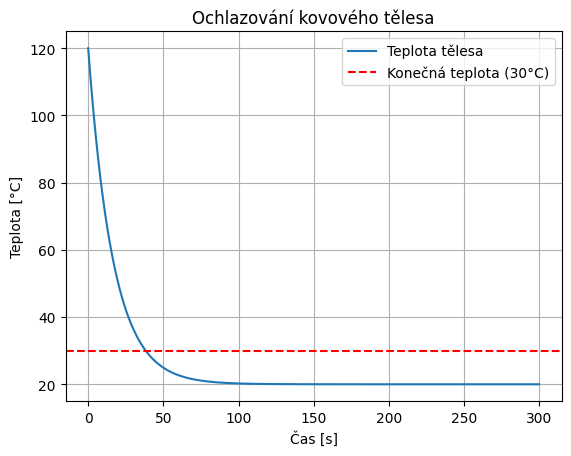

In [64]:
# Vykreslení grafu pomocí Eulerovy metody (stejná úloha)
import numpy as np
import matplotlib.pyplot as plt

t_max = 300     # Maximální čas [s]

# Vytvoření pole časů
times = np.arange(0, t_max, dt)

# Inicializace pole teplot
temperatures = np.zeros_like(times)
temperatures[0] = T_0

# Eulerova metoda pro výpočet teploty
for i in range(1, len(times)):
    dTdt = -B * (temperatures[i-1] - T_p)
    temperatures[i] = temperatures[i-1] + dTdt * dt

# Vykreslení vývoje teploty v čase
plt.plot(times, temperatures, label='Teplota tělesa')
plt.xlabel('Čas [s]')
plt.ylabel('Teplota [°C]')
plt.title('Ochlazování kovového tělesa')
plt.axhline(T_f, color='red', linestyle='--', label=f'Konečná teplota ({T_f}°C)')
plt.legend()
plt.grid(True)
plt.show()


Eq(T(t), C1*exp(-0.06*t) + 20.0)

Eq(T(t), 20.0 + 100.0*exp(-0.06*t))

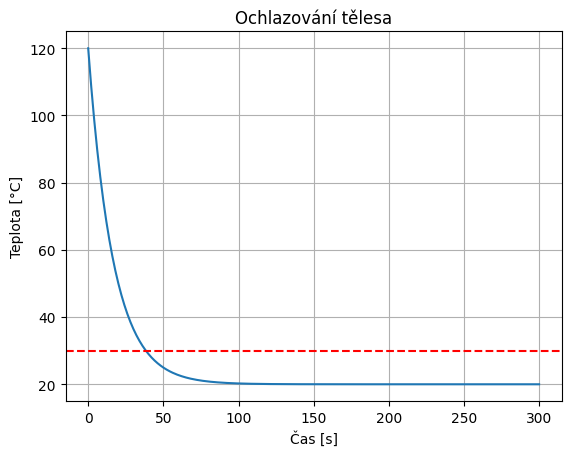

20.0 + 100.0*exp(-0.06*t)

Řešení diferenciální rovnice:


[38.3764182165674,
 38.3764182165674 - 104.71975511966*I,
 38.3764182165674 + 104.71975511966*I]

In [65]:
# Pomocí symbolické matematiky (stejná úloha)
import sympy as sp

# Definice symbolických proměnných
t = sp.symbols('t')
T = sp.Function('T')(t)

# Definice diferenciální rovnice
diffeq = sp.Eq(sp.Derivative(T, t), -B * (T - T_p))

# Řešení diferenciální rovnice
g_solution = sp.dsolve(diffeq, T)                           # řešení bez poč. podmínky
display(g_solution)
solution = sp.dsolve(diffeq, ics={T.subs(t,0): T_0})        # nutno zadat počáteční podmínku
display(solution)

# Vytvoření funkce pro teplotu
T_func = sp.lambdify(t, solution.rhs, 'numpy')

# Výpočet teploty pro dané časy
times = np.linspace(0, 300, 300)  # časy v sekundách
temperatures = T_func(times)

# Vykreslení výsledků
import matplotlib.pyplot as plt

plt.plot(times, temperatures)
plt.xlabel('Čas [s]')
plt.ylabel('Teplota [°C]')
plt.title('Ochlazování tělesa')
plt.axhline(T_f, color='red', linestyle='--', label=f'Konečná teplota ({T_f}°C)')
plt.grid(True)
plt.show()

# Výpočet času
display(solution.rhs)
equation = sp.Eq(solution.rhs, T_f)
# Vyřešení rovnice pro t
solution = sp.solve(equation, t)

# Výpis řešení
print("Řešení diferenciální rovnice:")
display(solution)


#### Chemický model - chemická kinetika
Chemická kinetika popisuje rychlost chemické reakce komponent a popisuje závislost rychlosti reakce na parametrech a podmínkách, při kterých probíhá. Jde na příklad o počet molekul $n$, které se reakce účastní, objem ve kterém, se reakce odehrává $V$ nebo čas $t$, po který reakce probíhá.

Rychlost reakce $v$ se dá vyjádřit jako změna počtu molů látky $\Delta n$ v objemu $V$ za čas $t$.

$$v =\frac{|\Delta n|}{V\Delta t} \rightarrow \lim_{\Delta t \rightarrow 0} \frac{|\Delta n|}{V\Delta t} = \left| \frac{{\rm d} n}{ V{\rm d} t} \right|$$

Pokud je $V = konst$, lze rovnici přepsat do tvaru

$$\frac{{\rm d}n}{V{\rm d}t} = \frac{{\rm d}c}{{\rm d}t} \rightarrow \frac{{\rm d}n}{V} = {\rm d}c$$

kde $c$ je koncentrace látky v čase $t$.

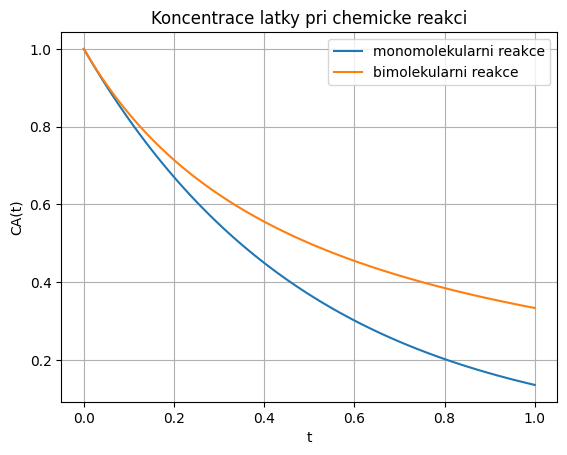

In [66]:
tmin=0
tmax=1
dt = 0.01
t = np.arange(tmin, tmax+dt, dt)

k = 2
CA0 = 1

f_mono = lambda t,k,CA0: CA0*np.exp(-k*t)
CA_mono = f_mono(t,k, CA0)

f_bi = lambda t,k,CA0: CA0/(1+CA0*k*t)
CA_bi = f_bi(t,k, CA0)

plt.plot(t, CA_mono, label="monomolekularni reakce")
plt.plot(t, CA_bi, label="bimolekularni reakce")

plt.title('Koncentrace latky pri chemicke reakci')
plt.xlabel('t')
plt.ylabel('CA(t)')
plt.grid()
plt.legend()
plt.show()

#### Biologický model - šíření nemocí s konstantní infekčností


- Počet nemocných jedinců $D$ roste s konstantní mírou infekce $a$,
- každá infikovaná osoba má konstantní pravděpodobnost $b$, že se vyléčí.

Změnu počtu nakažených osob lze popsat rovnicí
$$\frac{{\rm d}D}{{\rm d}t} = a-bD$$

která má analytické řešení
$$D(t) = \frac{1}{b}\left( a- e^{-b(C+t)} \right)$$

kde $C = -\ln(a-bD(0))/b$ je integrační konstanta. Model má dále rovnovážné řešení ve tvaru
$$\frac{{\rm d}D}{{\rm d}t}=0 \rightarrow D_0 = \frac{a}{b}$$


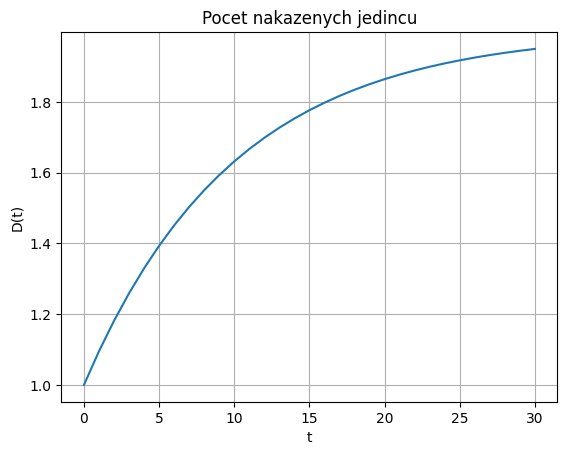

In [67]:
tmin=0
tmax=30
dt = 1

b = 0.1
a = 0.2
D0 = 1
C = -np.log(a-b*D0)/b

t = np.arange(tmin, tmax+dt, dt)
f = lambda t,a,b,C: 1/b*(a-np.exp(-b*(C+t)))
D = f(t, a, b, C)

plt.plot(t, D)

plt.title('Pocet nakazenych jedincu')
plt.xlabel('t')
plt.ylabel('D(t)')
plt.grid()
plt.show()

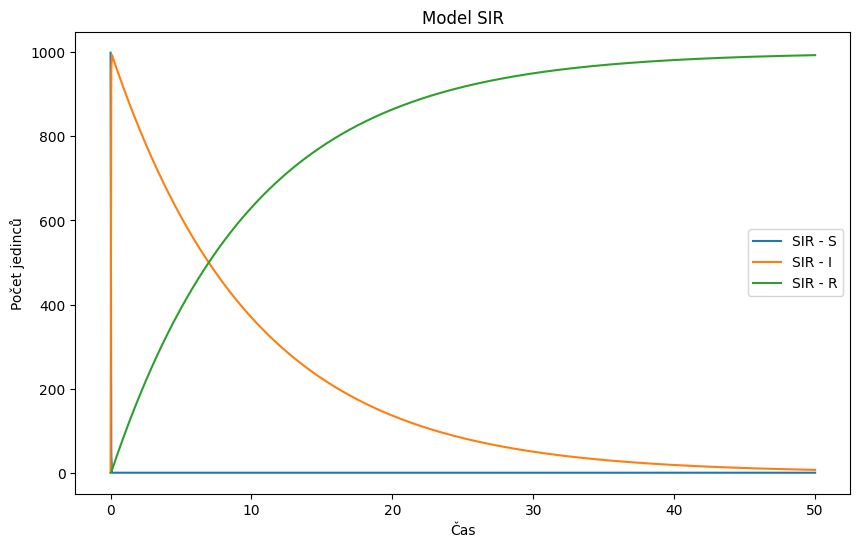

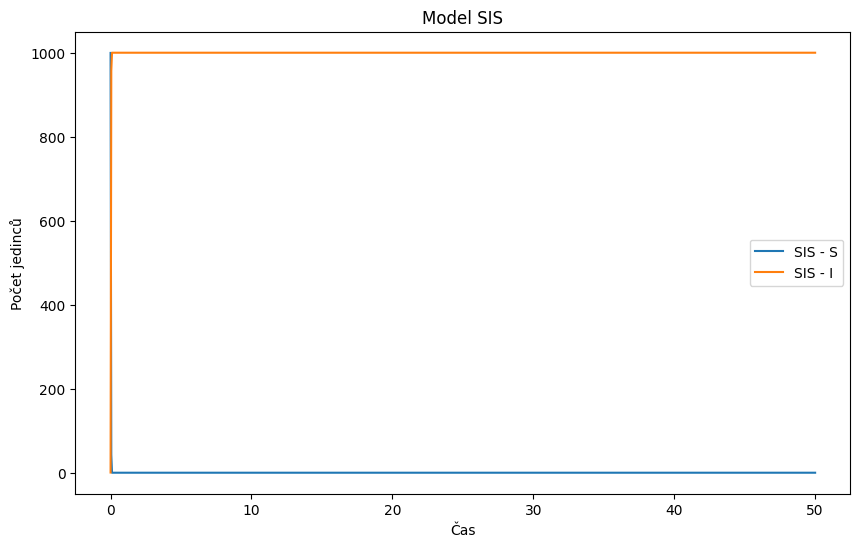

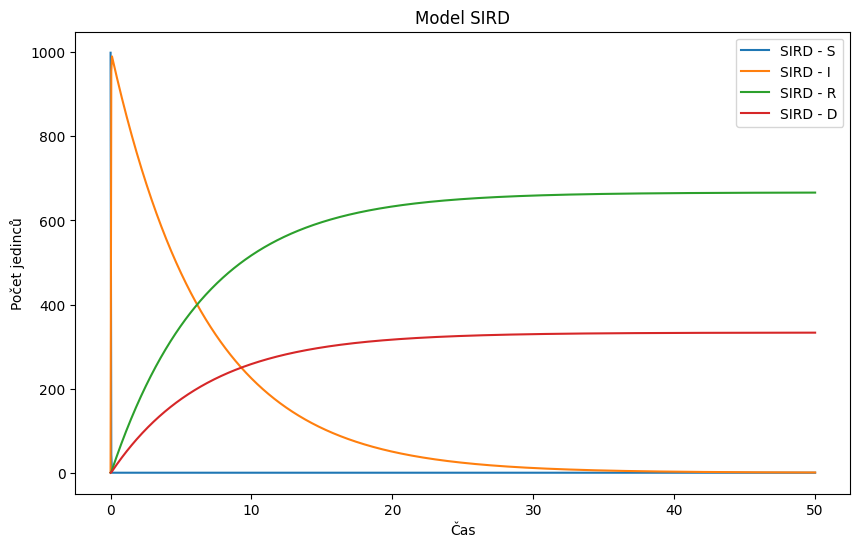

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def sir_model(t, y, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I                            # dS/dt = -βSI
    dIdt = beta * S * I - gamma * I                 # dI/dt = βSI - γI
    dRdt = gamma * I                                # dR/dt = γI
    return [dSdt, dIdt, dRdt]

def sis_model(t, y, beta, gamma):
    S, I = y
    dSdt = -beta * S * I + gamma * I                # dS/dt = -βSI + γI
    dIdt = beta * S * I - gamma * I                 # dI/dt = βSI - γI
    return [dSdt, dIdt]

def sird_model(t, y, beta, gamma, delta):
    S, I, R, D = y
    dSdt = -beta * S * I                            # dS/dt = -βSI
    dIdt = beta * S * I - gamma * I - delta * I     # dI/dt = βSI - γI - μI
    dRdt = gamma * I                                # dR/dt = γI
    dDdt = delta * I                                # dD/dt = μI
    return [dSdt, dIdt, dRdt, dDdt]

# Parametry modelů
beta = 0.2          # parametr šíření viru
gamma = 0.1         # parametr uzdravování
delta = 0.05        # parametr úmrtí infikovaných
N = 1000            # počet lidí
I0 = 1              # infikovaných v t=0
R0 = 0              # uzdravených v t=0

# Řešení modelů SIR, SIS, SIRD, SIRDV
t_span = [0, 500]
t_eval = np.linspace(0, 50, 1000)

# SIR model
sol_sir = solve_ivp(sir_model, t_span, [N - I0, I0, R0], args=(beta, gamma), t_eval=t_eval)
S_sir, I_sir, R_sir = sol_sir.y

# SIS model
sol_sis = solve_ivp(sis_model, t_span, [N - I0, I0], args=(beta, gamma), t_eval=t_eval)
S_sis, I_sis = sol_sis.y

# SIRD model
sol_sird = solve_ivp(sird_model, t_span, [N - I0 - R0, I0, R0, 0], args=(beta, gamma, delta), t_eval=t_eval)
S_sird, I_sird, R_sird, D_sird = sol_sird.y

# Vykreslení výsledků
plt.figure(figsize=(10, 6))
plt.plot(sol_sir.t, S_sir, label='SIR - S')
plt.plot(sol_sir.t, I_sir, label='SIR - I')
plt.plot(sol_sir.t, R_sir, label='SIR - R')
plt.xlabel('Čas')
plt.ylabel('Počet jedinců')
plt.title('Model SIR')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(sol_sis.t, S_sis, label='SIS - S')
plt.plot(sol_sis.t, I_sis, label='SIS - I')
plt.xlabel('Čas')
plt.ylabel('Počet jedinců')
plt.title('Model SIS')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(sol_sird.t, S_sird, label='SIRD - S')
plt.plot(sol_sird.t, I_sird, label='SIRD - I')
plt.plot(sol_sird.t, R_sird, label='SIRD - R')
plt.plot(sol_sird.t, D_sird, label='SIRD - D')
plt.xlabel('Čas')
plt.ylabel('Počet jedinců')
plt.title('Model SIRD')
plt.legend()
plt.show()

#### Ekonomický model - spotřeba domácností
Model má za cíl popsat vývoj spotřeby domácností v závislosti na míře růstu $k$ a času, po který k růstu dochází. Růst je ovlivněn zejména výdaji na


- dlouhodobou spotřebu (spotřebiče, nábytek atd.),
- krátkodobou spotřebu (potraviny, oblečení atd.),
- služby (nájem atd.)


Mějme celkovou spotřebu domácností $C$, která roste v konstantní míře 3 \%, tj. $k=0.03$, poté následující rovnice popisuje vývoj spotřeby v čase $C^{\prime}$.

\begin{align*}
  \frac{C^{\prime}}{C} =& k \\
   \frac{{\rm d}C}{C} =& k{\rm d}t \\
   \ln |C| =& kt\\
   \textcolor{red}{C =}& \textcolor{red}{c\cdot e^{kt}}
\end{align*}

kde konstanta $c$ udává míru růstu.

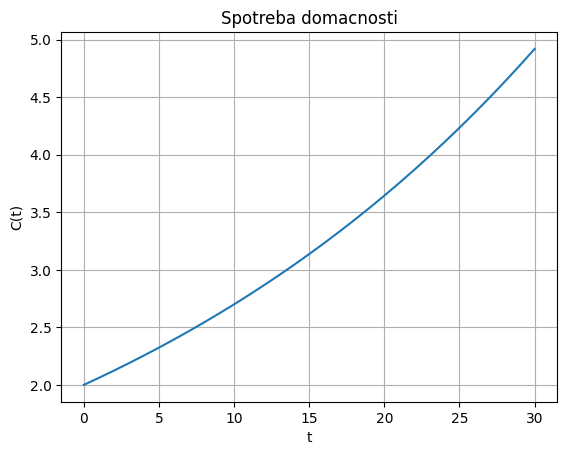

In [68]:
tmin=0
tmax=30
dt = 1

k = 0.03
c = 2

t = np.arange(tmin, tmax+dt, dt)
f = lambda t,c,k: c*np.exp(k*t)
C = f(t, c, k)

plt.plot(t, C)

plt.title('Spotreba domacnosti')
plt.xlabel('t')
plt.ylabel('C(t)')
plt.grid()
plt.show()

#### Cvičení - ODE 2. řádu
<font color="green">Porovnejte přesná řešení předchozího příkladu s numerickým odhadem, například pomocí explicitní a implicitní Eulerovy metody.

Soustava rovnic má tvar
\begin{align*}
  y^{\prime} =& z(x)\\
  z^{\prime} =& \ln x
\end{align*}

a přesná řešení mají pro jednotlivé rovnice tvar

\begin{align*}
  y(x) =& \frac{x^2}{2} \left( \ln x - \frac{3}{2} \right)\\
  z(x) =& x\ln x -x + c
\end{align*}
</font>

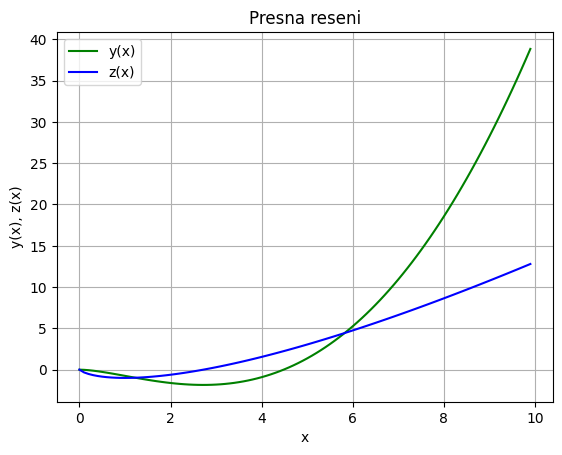

In [73]:
import numpy as np
import matplotlib.pyplot as plt

xmin = 0.0000000000001
xmax = 10
dx = 0.1
x = np.arange(xmin, xmax, dx)

y = lambda x: x**2/2*(np.log(x)-3/2)
z = lambda x, c: x*np.log(x) - x + c

c = 0
plt.plot(x, y(x), 'g-', label="y(x)")
plt.plot(x, z(x, c), 'b-', label="z(x)")
plt.title('Presna reseni')
plt.xlabel('x')
plt.ylabel('y(x), z(x)')
plt.grid()
plt.legend()
plt.show()

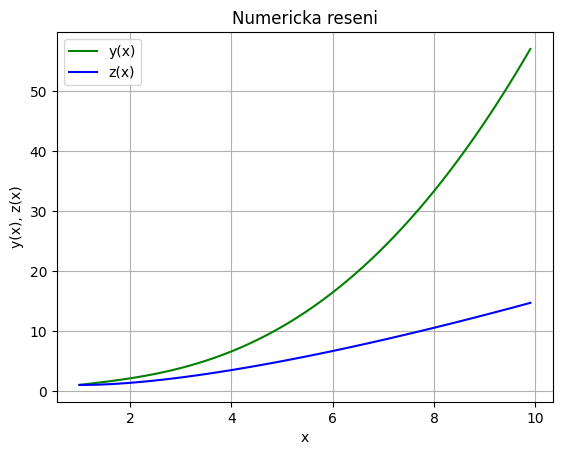

In [74]:
import numpy as np
import matplotlib.pyplot as plt

xmin = 1
xmax = 10
dx = 0.1
x = np.arange(xmin, xmax, dx)
y = np.zeros(len(x))
z = np.zeros(len(x))

y[0] = 1
z[0] = 1

fy = lambda z: z
fz = lambda x: np.log(x)

for i in range(0, len(x) - 1):
    y[i+1] = y[i] + dx*fy(z[i])
    z[i+1] = z[i] + dx*fz(x[i])

plt.plot(x, y, 'g-', label='y(x)')
plt.plot(x, z, 'b-', label='z(x)')
plt.title('Numericka reseni')
plt.xlabel('x')
plt.ylabel('y(x), z(x)')
plt.grid()
plt.legend()
plt.show()


#### Zombie apokalypsa

https://scipy-cookbook.readthedocs.io/items/Zombie_Apocalypse_ODEINT.html

In [ ]:
!python -m pip install lmfit

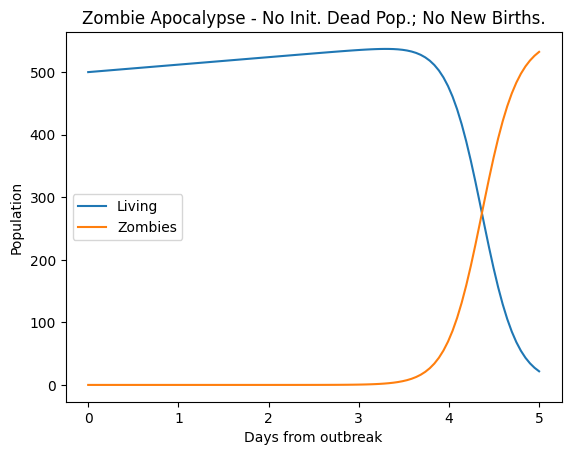

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 50
    # data points      = 13
    # variables        = 5
    chi-square         = 211163.732
    reduced chi-square = 26395.4665
    Akaike info crit   = 136.040717
    Bayesian info crit = 138.865463
[[Variables]]
    S0:  507.715769 +/- 99.0909927 (19.52%) (init = 500)
    Z0:  0 (fixed)
    R0:  0 (fixed)
    P:   8.46342072 +/- 80.5130465 (951.31%) (init = 10)
    d:   0.00140132 +/- 0.09524424 (6796.75%) (init = 0.0005)
    B:   0.00860849 +/- 0.00958246 (111.31%) (init = 0.01)
    G:   0.0001 (fixed)
    A:   2.8689e-04 +/- 0.02821536 (9834.76%) (init = 0.0005)
[[Correlations]] (unreported correlations are < 0.100)
    C(d, A)  = +0.9966
    C(d, B)  = -0.9681
    C(B, A)  = -0.9457
    C(P, A)  = +0.8036
    C(P, d)  = +0.7824
    C(P, B)  = -0.6753
    C(S0, P) = -0.6146
    C(S0, A) = -0.1325
    C(S0, d) = -0.1231


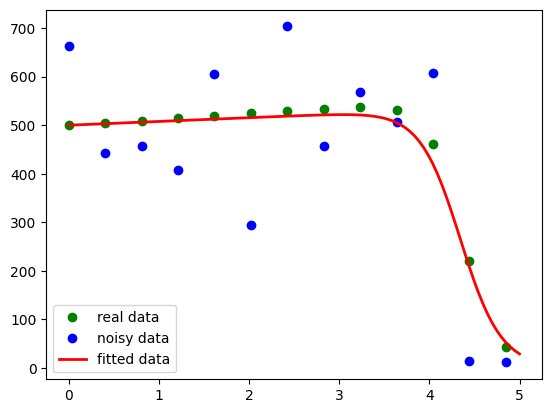

In [77]:
# zombie apocalypse modeling
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from lmfit import minimize, Parameters, Parameter, report_fit
from scipy.integrate import odeint


# solve the system dy/dt = f(y, t)
def f(y, t, paras):

    Si = y[0]
    Zi = y[1]
    Ri = y[2]

    try:
        P = paras['P'].value
        d = paras['d'].value
        B = paras['B'].value
        G = paras['G'].value
        A = paras['A'].value

    except:
        P, d, B, G, A = paras
    # the model equations (see Munz et al. 2009)
    f0 = P - B * Si * Zi - d * Si
    f1 = B * Si * Zi + G * Ri - A * Si * Zi
    f2 = d * Si + A * Si * Zi - G * Ri
    return [f0, f1, f2]


def g(t, x0, paras):
    """
    Solution to the ODE x'(t) = f(t,x,p) with initial condition x(0) = x0
    """
    x = odeint(f, x0, t, args=(paras,))
    return x


def residual(paras, t, data):
    x0 = paras['S0'].value, paras['Z0'].value, paras['R0'].value
    model = g(t, x0, paras)
    s_model = model[:, 0]
    return (s_model - data).ravel()

# just for reproducibility reasons
np.random.seed(1)

# initial conditions
S0 = 500.              # initial population
Z0 = 0                 # initial zombie population
R0 = 0                 # initial death population
y0 = [S0, Z0, R0]     # initial condition vector
t = np.linspace(0, 5., 100)         # time grid

P = 12      # birth rate
d = 0.0001  # natural death percent (per day)
B = 0.0095  # transmission percent  (per day)
G = 0.0001  # resurect percent (per day)
A = 0.0001  # destroy percent  (per day)

# solve the DEs
soln = odeint(f, y0, t, args=((P, d, B, G, A), ))
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

# plot results
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - No Init. Dead Pop.; No New Births.')
plt.legend(loc=0)
plt.show()

# generate fake data
S_real = S[0::8]
S_measured = S_real + np.random.randn(len(S_real)) * 100
t_measured = t[0::8]

plt.figure()
plt.plot(t_measured, S_real, 'o', color='g', label='real data')

# add some noise to your data to mimic measurement erros
plt.plot(t_measured, S_measured, 'o', color='b', label='noisy data')

# set parameters including bounds; you can also fix parameters (use vary=False)
params = Parameters()
params.add('S0', value=S0, min=490., max=510.)
params.add('Z0', value=Z0, vary=False)
params.add('R0', value=R0, vary=False)
params.add('P', value=10, min=8., max=12.)
params.add('d', value=0.0005, min=0.00001, max=0.005)
params.add('B', value=0.01, min=0.00001, max=0.01)
params.add('G', value=G, vary=False)
params.add('A', value=0.0005, min=0.00001, max=0.001)

# fit model
result = minimize(residual, params, args=(t_measured, S_measured), method='leastsq')  # leastsq nelder
# check results of the fit
data_fitted = g(t, y0, result.params)

plt.plot(t, data_fitted[:, 0], '-', linewidth=2, color='red', label='fitted data')
plt.legend()
# display fitted statistics
report_fit(result)

plt.show()